In [ ]:
import random
import torch
import matplotlib.pyplot as plt
import numpy as np

from Visualizations import visualize_one_sample, plot_pansharpen_bands
from models.PansharpeningUnetppLightning import PanSharpenUnetppLightning
from SentinelData import SentinelCroppedDataset

# Testing & Profiling

In [6]:
# import cProfile
# from SentinelData import SentinelCroppedDataset

# def profile_dataloader(n_batches=50):
#     dataset = SentinelCroppedDataset("./dataset_sentinel")
#     dataloaders = dataset.produce_dataloaders() #train, val, test
#     for i, batch in enumerate(dataloaders[0]):
#         print(f"Batch {i} done")
#         if i >= n_batches:
#             break


# %prun -D dataloader.prof profile_dataloader()

# if __name__ == "__main__":
#     profiler = cProfile.Profile()
#     profiler.enable()

#     profile_dataloader()

#     profiler.disable()
#     profiler.dump_stats("dataloader.prof")

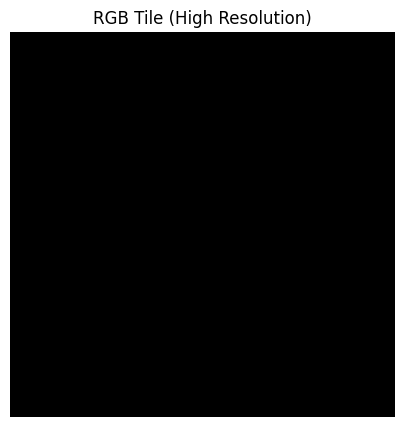

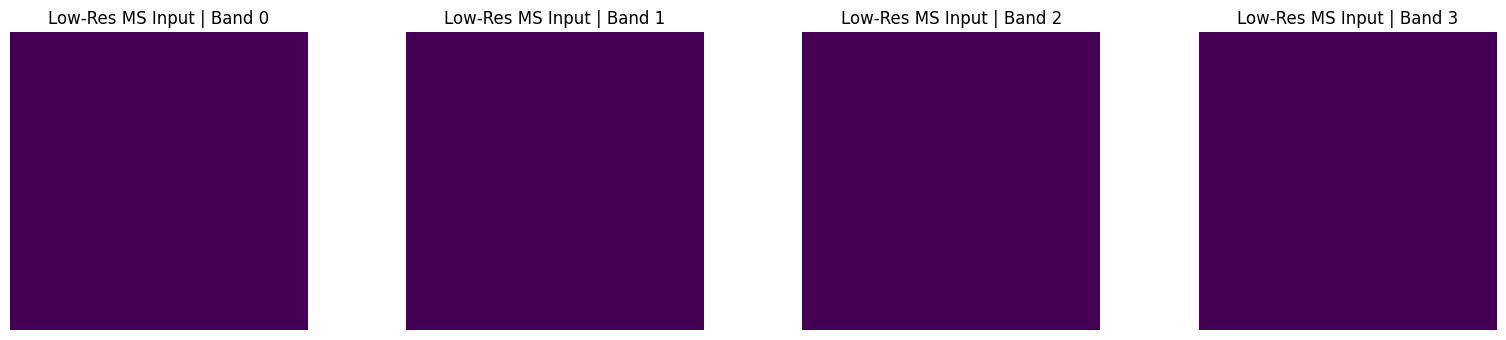

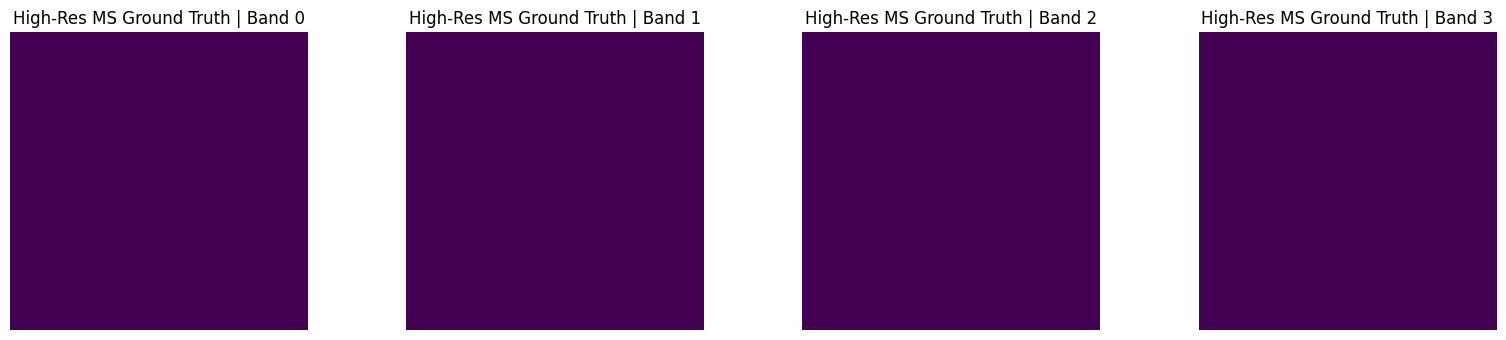

Displayed sample tiles from: val loader.


In [7]:
visualize_one_sample(
        data_path="./dataset_sentinel/",
        loader_type="val",    # or "val" or "test"
    )

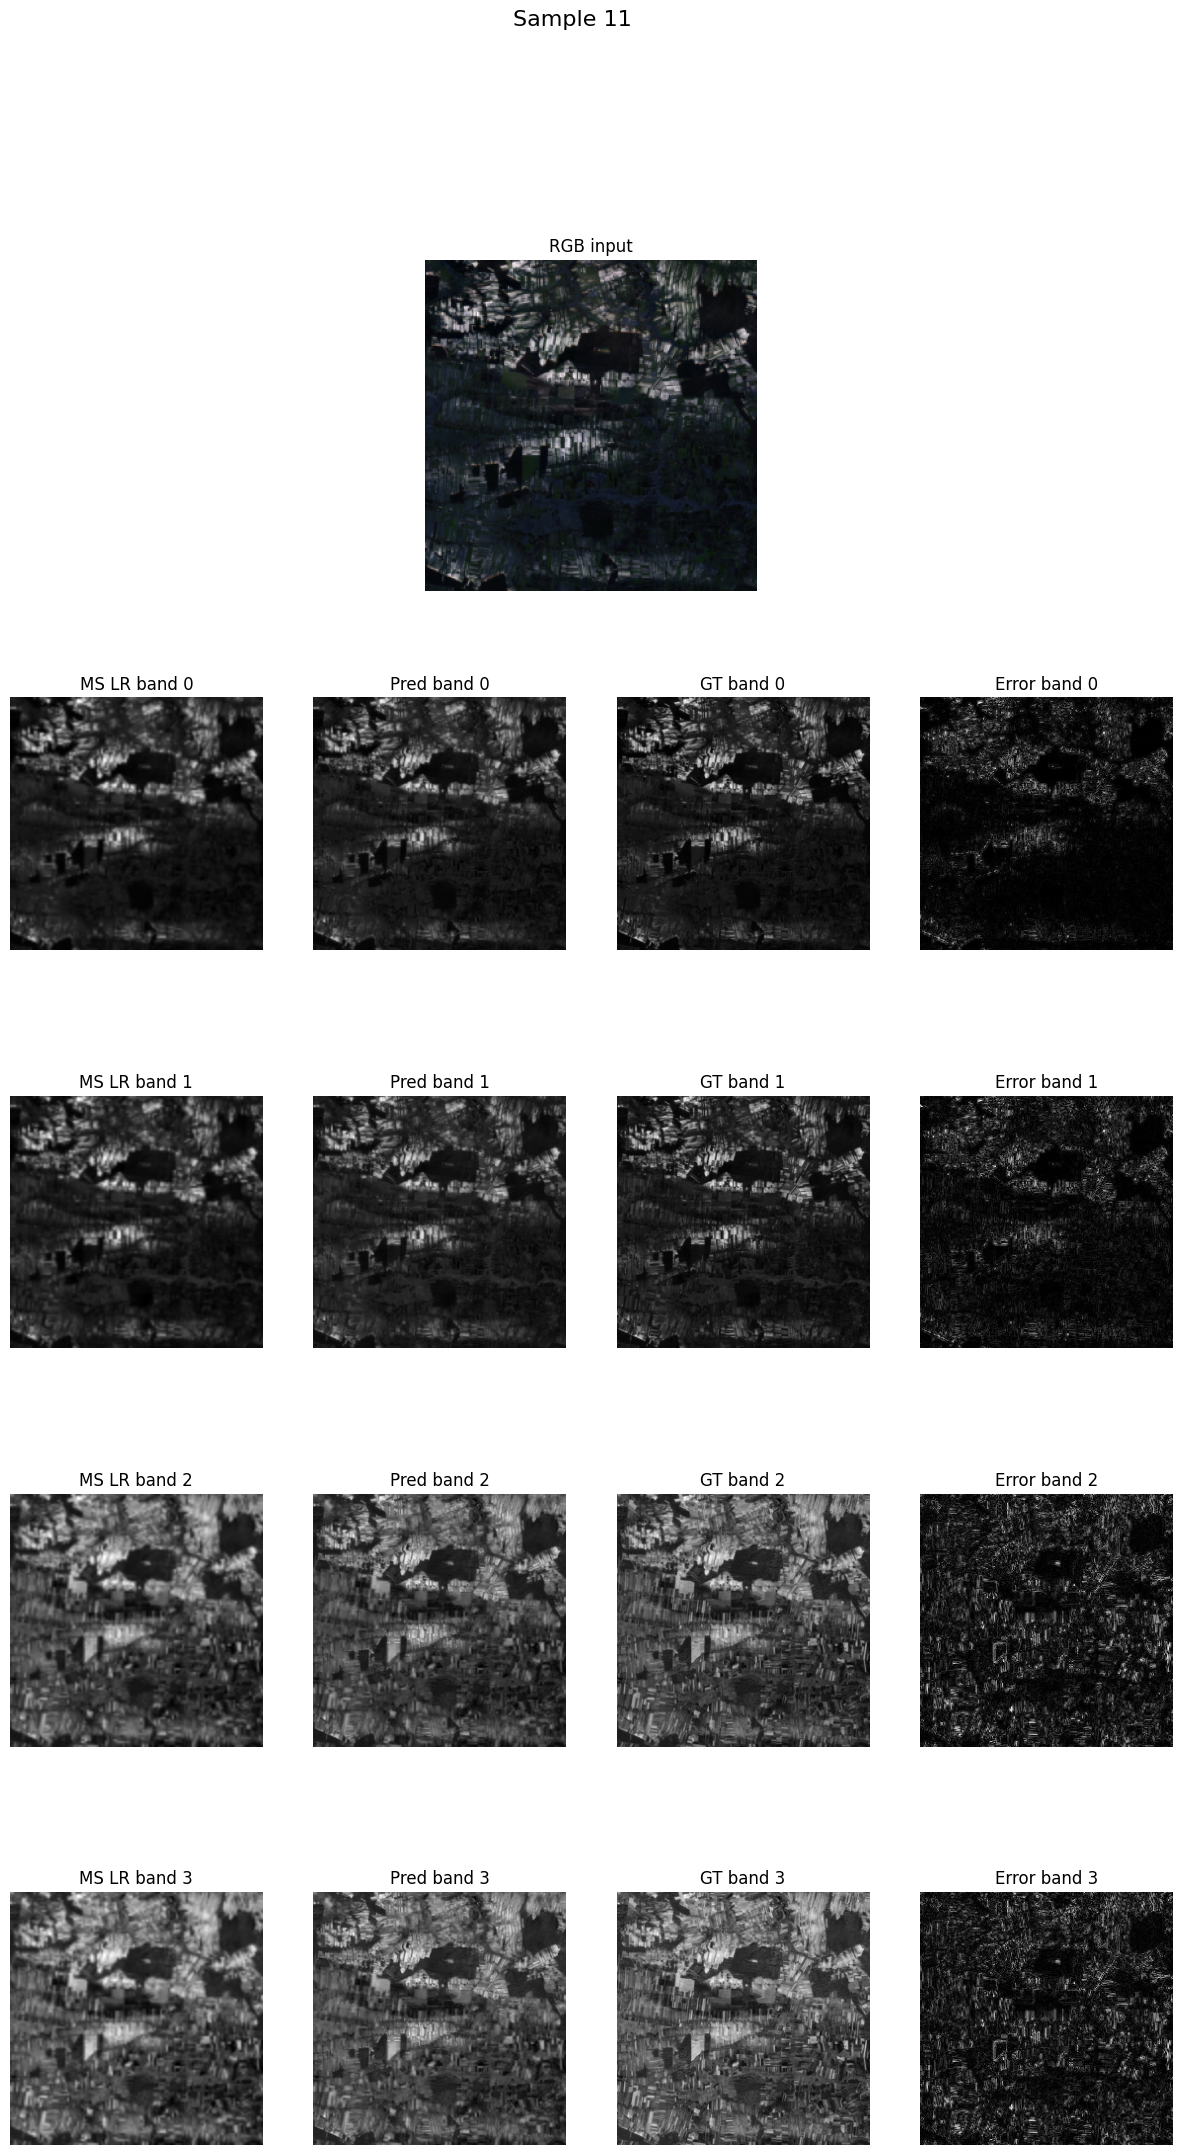

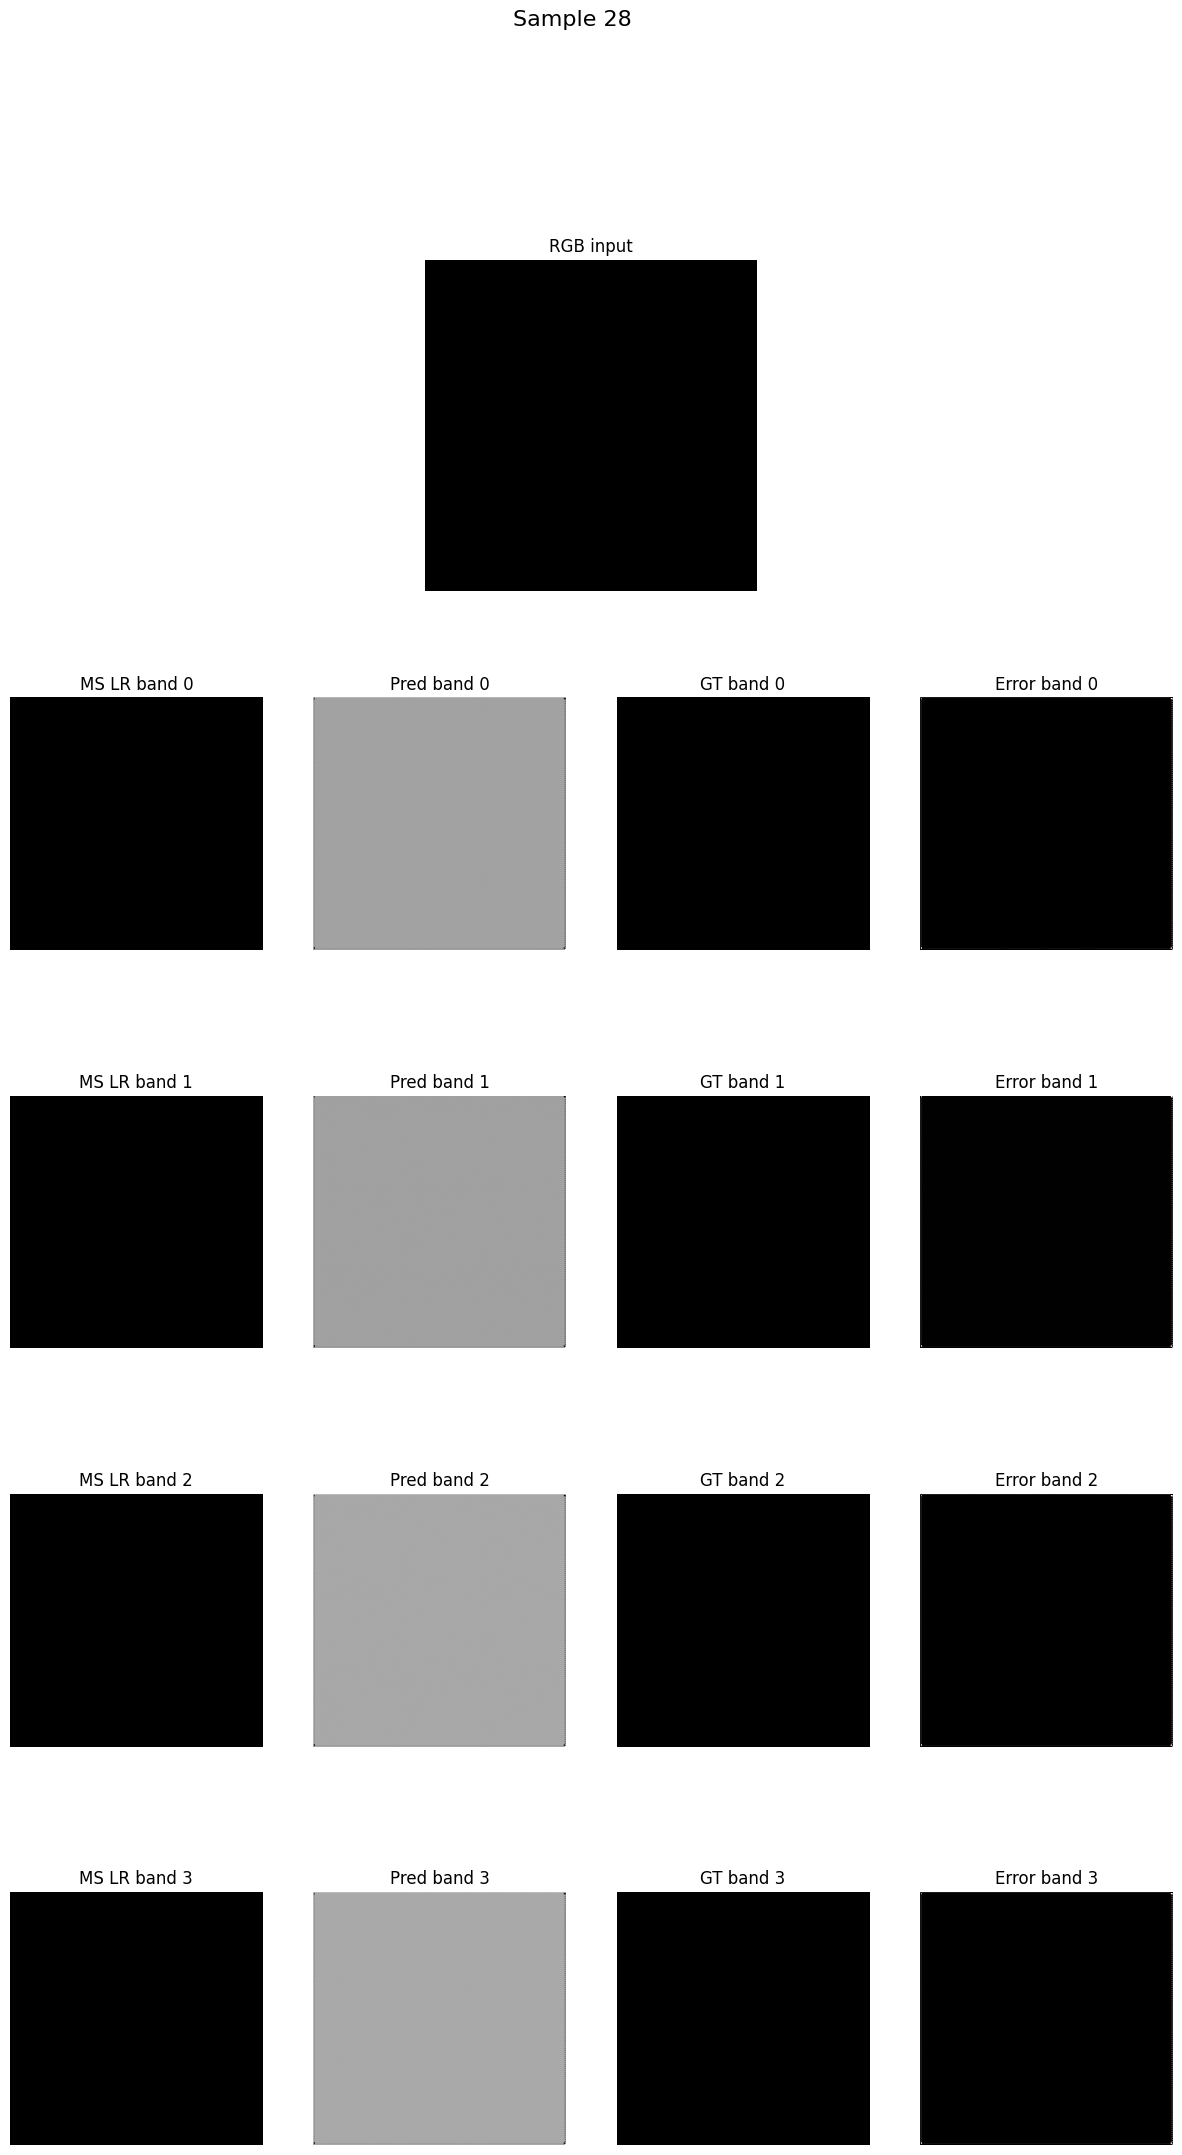

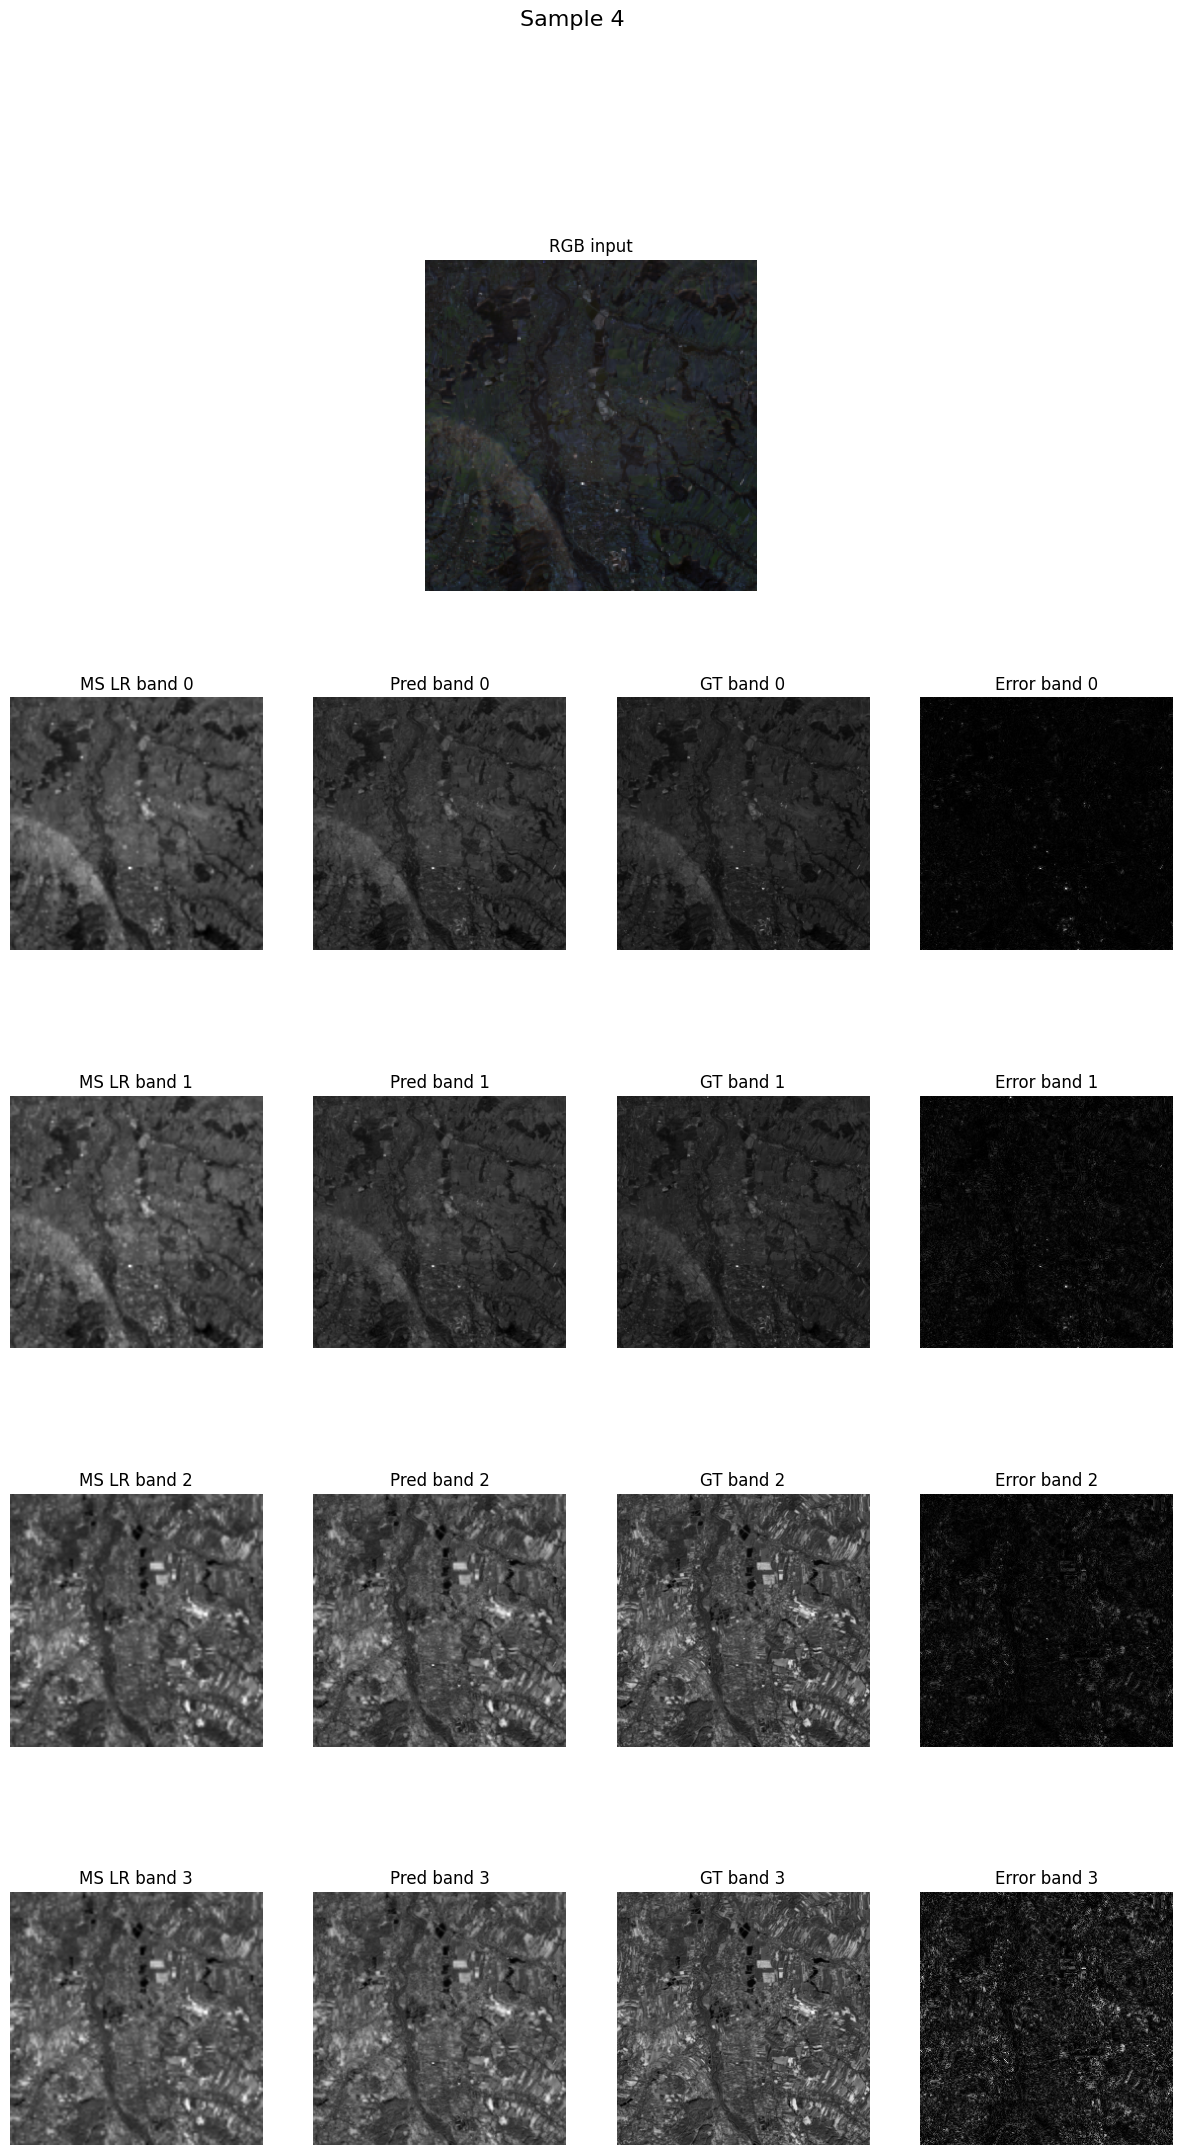

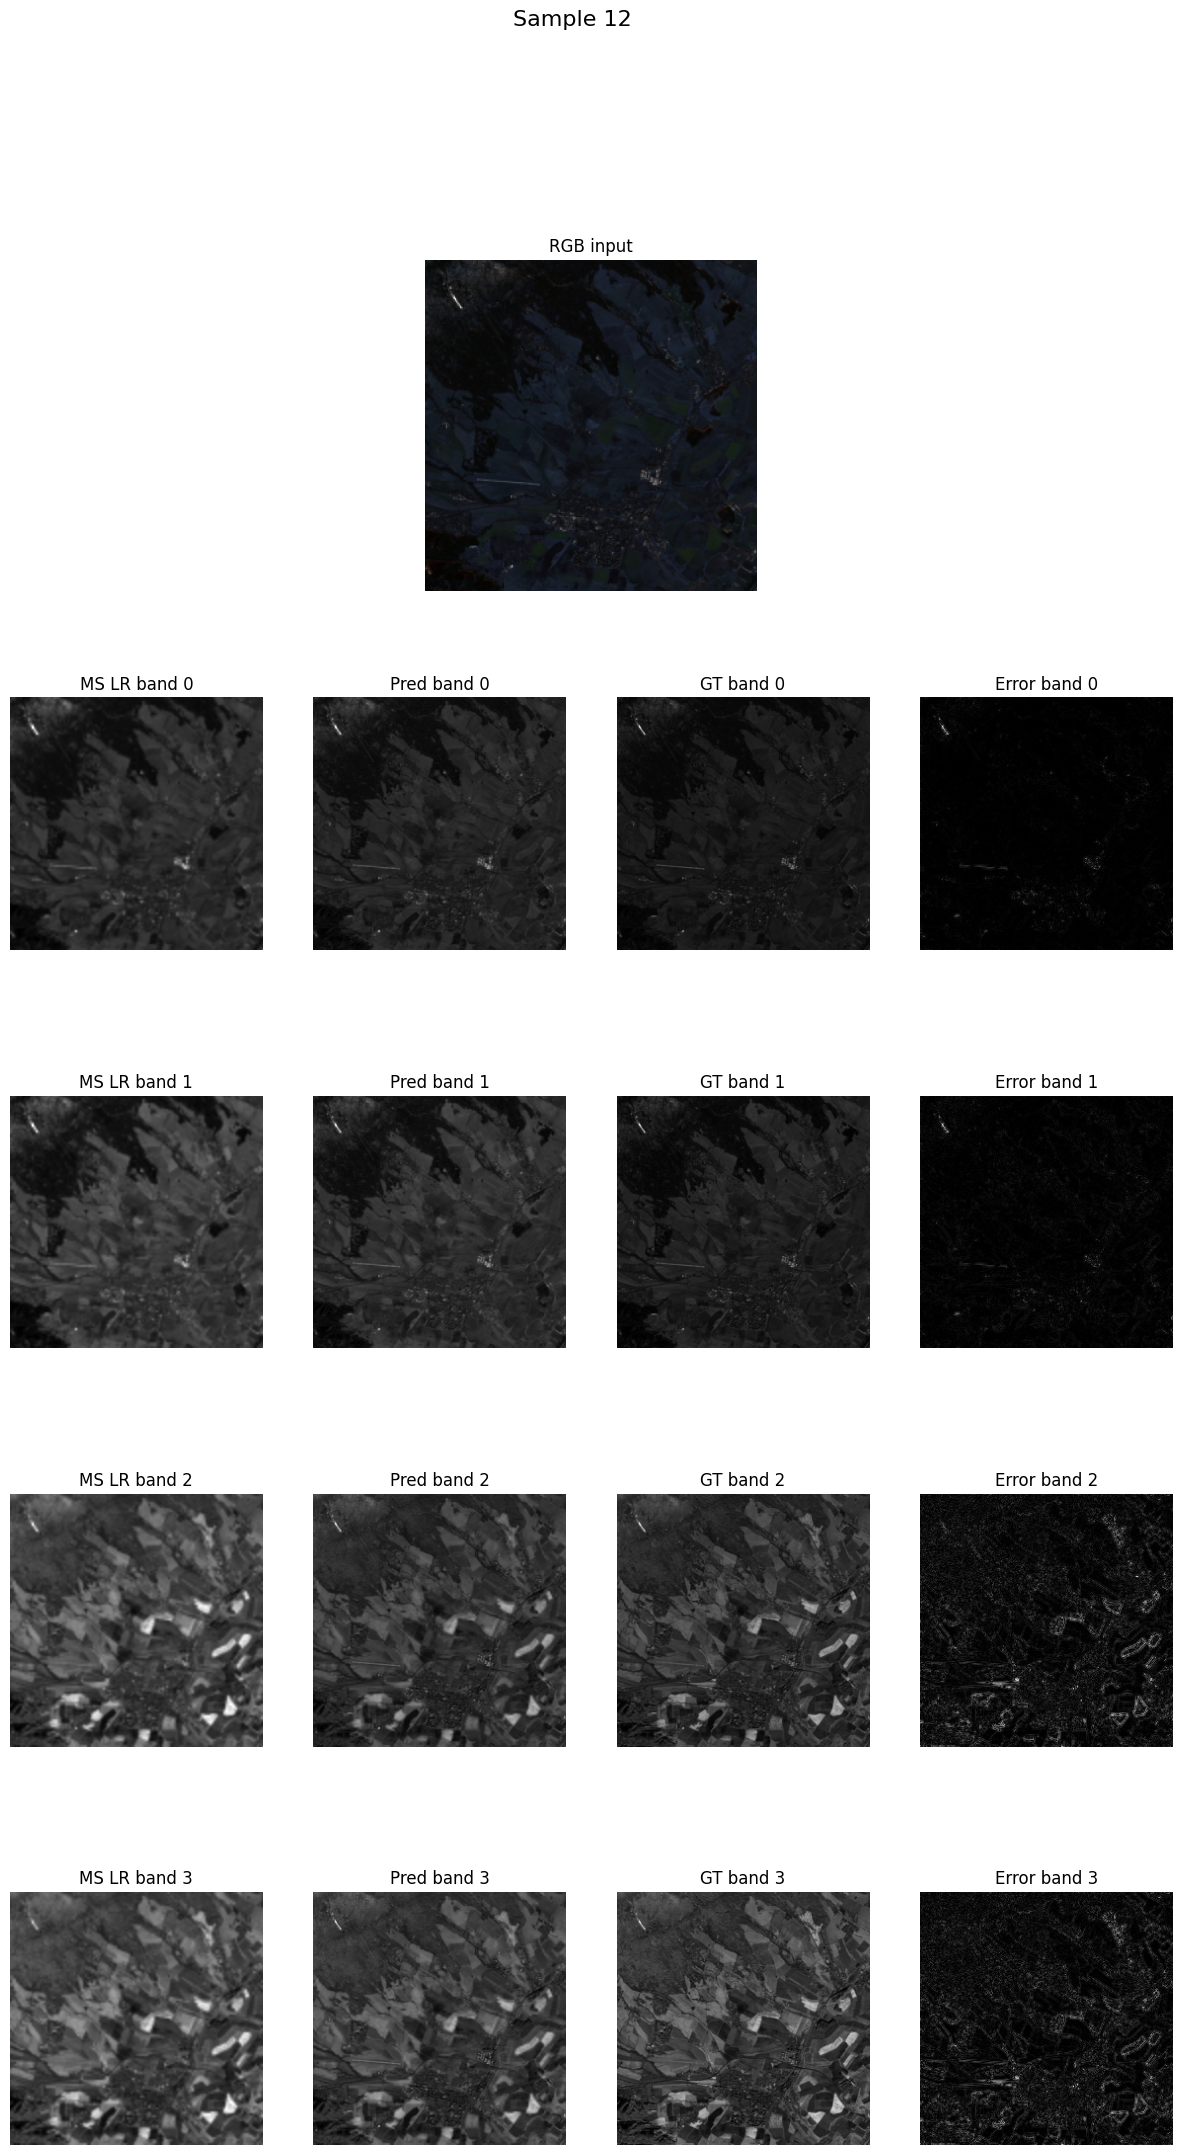

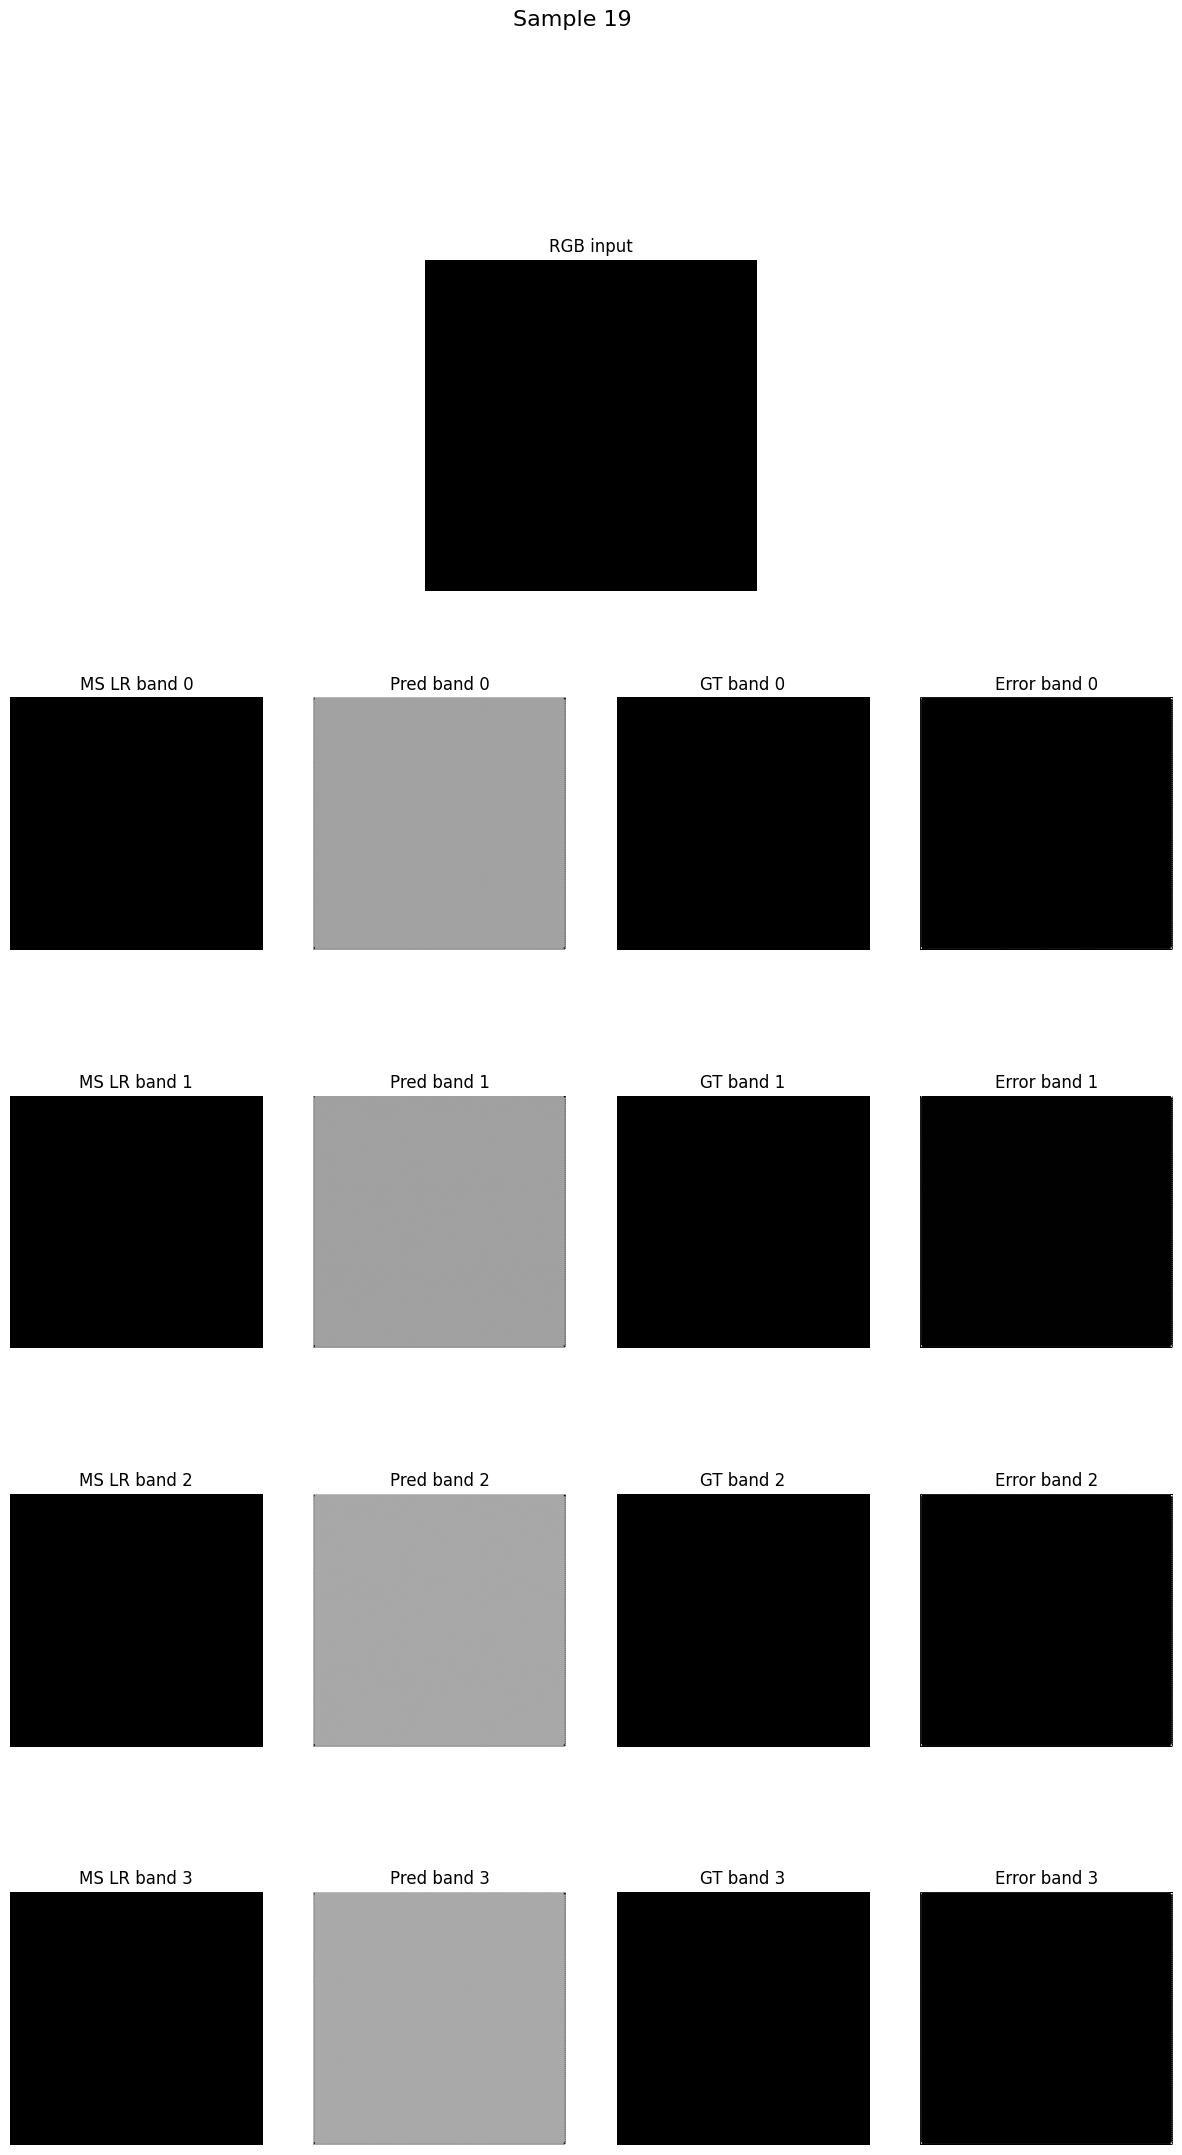

In [ ]:
model = PanSharpenUnetppLightning.load_from_checkpoint("./lightning_logs/version_27/checkpoints/PanSharpenUnetppLightningTraining-drop-0.5-epoch=249-val_l1=0.0010.ckpt")

dataset = SentinelCroppedDataset("./dataset_sentinel")
dataloaders = dataset.produce_dataloaders() #train, val, test

plot_pansharpen_bands(
    model=model,
    test_loader=dataloaders[2],
    num_samples=5,
)